# ANÁLISIS DE LOS DATOS<br>

En este apartado se realizará un análisis sobre los datos obtenidos tras haber realizado la extracción de características. El análisis de los datos se realizará exclusivamente del subconjunto de datos de entrenamiento, para no interferir en los resultados con el subconjunto de datos de prueba.<br>

- Importamos las _librerías_ necesarias:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

- __Directorios__ utilizados:<br>

In [2]:
import os
PROJECT_ROOT_PATH = "."
DATASETS_PATH = PROJECT_ROOT_PATH + os.sep + "datasets"
FINAL_DATASETS_PATH = PROJECT_ROOT_PATH + os.sep + "final_datasets"

***
## Lectura de los datos<br>

- Con la siguiente función leemos el fichero CSV creado en el paso anterior y lo almacenamos en un _DataFrame_:<br>

In [3]:
import pandas as pd

def load_data(filename, separator, folder, path=FINAL_DATASETS_PATH):
    file_path = os.path.join(path, folder + os.sep + filename)
    return pd.read_csv(file_path, sep=separator)

***
## Método 1 extracción de características<br>

- Obtenemos un dataframe con el subconjunto de datos de entrenamiento. En él existen 483977 registros diferentes (483977 URLs). Posteriormente visualizamos los 5 primeros registros para ver la forma del mismo: <br>

In [4]:
SUBFOLDER_METHOD_1 = "4_extraccion_caracteristicas" + os.sep + "metodo_1"

df_train = load_data("4_1_train_features_dataset.csv",',', SUBFOLDER_METHOD_1)
print(len(df_train))
df_train.head()

483977


,total_length,is_ip,hostname_depth,domain_length,hostname_length,hostname_digits,n_special,www_prefix,vowel_consonant_ratio,digit_character_ratio,contains_'@',contains_'-',contains_'_',contains_'~',contains_'//',percent_encoding,is_shorten,bad_tld,malicious_extension,label
0,46,0,4,3,20,0,7,1,0.222222,0.0,0,0,0,0,0,0,0,0,0,0
1,57,0,3,6,16,0,5,0,0.450000,0.0,0,0,0,0,0,0,0,0,0,1
2,76,0,2,6,9,0,9,0,0.166667,0.0,0,0,0,0,0,0,0,0,0,1
3,51,0,4,9,20,0,9,1,0.351852,0.0,0,0,0,0,0,0,0,0,0,0
4,36,0,4,8,35,0,5,1,0.231481,0.0,0,1,0,0,0,0,0,0,1,0


- __Describimos__ el subconjunto de datos de entrenamiento (tanto con URLs maliciosas como no maliciosas):<br>

In [5]:
df_train.describe()

,total_length,is_ip,hostname_depth,domain_length,hostname_length,hostname_digits,n_special,www_prefix,vowel_consonant_ratio,digit_character_ratio,contains_'@',contains_'-',contains_'_',contains_'~',contains_'//',percent_encoding,is_shorten,bad_tld,malicious_extension,label
count,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.0,483977.0,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000,483977.000000
mean,51.037186,0.176688,3.233647,10.733909,19.373627,2.344835,7.494819,0.545082,0.172132,0.150653,0.004436,0.067053,0.0,0.0,0.001374,0.018937,0.000039,0.025400,0.204435,0.500001
std,34.319346,0.381405,0.864659,4.502968,9.581623,4.773879,4.516625,0.497964,0.110152,0.304295,0.066457,0.250114,0.0,0.0,0.037043,0.136302,0.006266,0.157337,0.403289,0.500001
min,7.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,3.000000,7.000000,14.000000,0.000000,5.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,3.000000,10.000000,18.000000,0.000000,6.000000,1.000000,0.181818,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,62.000000,0.000000,4.000000,14.000000,21.000000,0.000000,9.000000,1.000000,0.235294,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2307.000000,1.000000,21.000000,63.000000,240.000000,105.000000,209.000000,1.000000,0.875000,0.900000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- __Dividimos__ el _Dataframe_ original en __dos nuevos DataFrames__, conteniendo cada uno de ellos respectivamente las __URLs maliciosas__ y __no maliciosas__ del subconjunto de entrenamiento:<br>

In [6]:
df_benign_url = df_train[df_train['label'] == 0]
df_malicious_url = df_train[df_train['label'] == 1]

- Definimos aquellas variables que son binarias y aquellas que no:<br>

In [7]:
non_binary_features = [
    "total_length", 
    "hostname_depth", 
    "domain_length", 
    "hostname_length", 
    "hostname_digits", 
    "n_special",
    "vowel_consonant_ratio",
    "digit_character_ratio"
]
binary_features = [
    "is_ip", 
    "www_prefix", 
    "contains_'@'", 
    "contains_'-'", 
    "contains_'_'", 
    "contains_'~'", 
    "contains_'//'", 
    "percent_encoding", 
    "is_shorten", 
    "bad_tld", 
    "malicious_extension"
] 

- __Analizamos__ cada _dataframe_ por separado (URLs maliciosas y no maliciosas):<br>

### 1. URLs no maliciosas:<br>

- __Descripción__ de los datos:<br>

In [8]:
df_benign_url.describe()

,total_length,is_ip,hostname_depth,domain_length,hostname_length,hostname_digits,n_special,www_prefix,vowel_consonant_ratio,digit_character_ratio,contains_'@',contains_'-',contains_'_',contains_'~',contains_'//',percent_encoding,is_shorten,bad_tld,malicious_extension,label
count,241988.000000,241988.0,241988.000000,241988.000000,241988.000000,241988.000000,241988.000000,241988.000000,241988.000000,241988.000000,241988.000000,241988.000000,241988.0,241988.0,241988.000000,241988.000000,241988.0,241988.000000,241988.000000,241988.0
mean,50.482346,0.0,3.282973,9.500004,19.606815,0.080136,7.505818,0.998049,0.201537,0.004869,0.000624,0.049527,0.0,0.0,0.000079,0.018422,0.0,0.004087,0.130597,0.0
std,25.470133,0.0,0.511021,4.473889,5.849203,0.461173,4.152702,0.044122,0.070535,0.031264,0.024972,0.216967,0.0,0.0,0.008861,0.134473,0.0,0.063799,0.336960,0.0
min,7.000000,0.0,2.000000,1.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,34.000000,0.0,3.000000,7.000000,15.000000,0.000000,5.000000,1.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,45.000000,0.0,3.000000,9.000000,19.000000,0.000000,7.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,62.000000,0.0,4.000000,12.000000,23.000000,0.000000,9.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
max,643.000000,0.0,10.000000,63.000000,75.000000,11.000000,144.000000,1.000000,0.750000,0.500000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0


### 2. URLs maliciosas:<br>

- __Descripción__ de los datos:

In [10]:
df_malicious_url.describe()

,total_length,is_ip,hostname_depth,domain_length,hostname_length,hostname_digits,n_special,www_prefix,vowel_consonant_ratio,digit_character_ratio,contains_'@',contains_'-',contains_'_',contains_'~',contains_'//',percent_encoding,is_shorten,bad_tld,malicious_extension,label
count,241989.000000,241989.000000,241989.000000,241989.000000,241989.00000,241989.000000,241989.000000,241989.000000,241989.000000,241989.000000,241989.000000,241989.000000,241989.0,241989.0,241989.000000,241989.000000,241989.000000,241989.000000,241989.000000,241989.0
mean,51.592023,0.353376,3.184322,11.967808,19.14044,4.609524,7.483820,0.092116,0.142727,0.296435,0.008248,0.084578,0.0,0.0,0.002670,0.019451,0.000079,0.046713,0.278273,1.0
std,41.307315,0.478019,1.108721,4.182439,12.21856,5.925324,4.853318,0.289190,0.132524,0.376442,0.090445,0.278254,0.0,0.0,0.051599,0.138105,0.008861,0.211024,0.448149,0.0
min,10.000000,0.000000,1.000000,1.000000,4.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,29.000000,0.000000,2.000000,9.000000,14.00000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,43.000000,0.000000,3.000000,13.000000,16.00000,0.000000,6.000000,0.000000,0.156250,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,62.000000,1.000000,4.000000,14.000000,20.00000,11.000000,8.000000,0.000000,0.222222,0.800000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,2307.000000,1.000000,21.000000,62.000000,240.00000,105.000000,209.000000,1.000000,0.875000,0.900000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


### __Histogramas__ (comparación):<br>

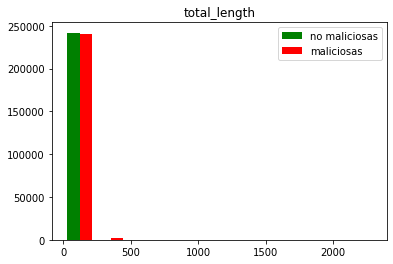

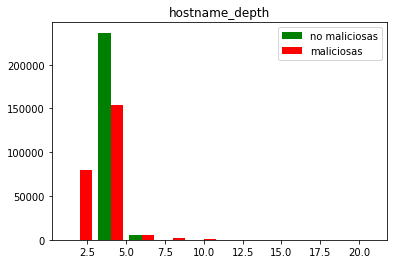

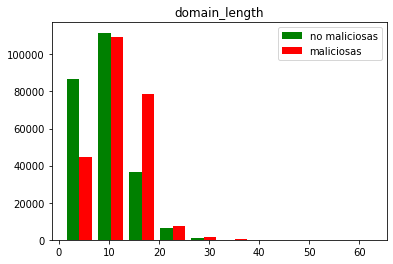

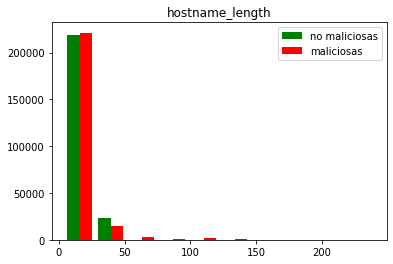

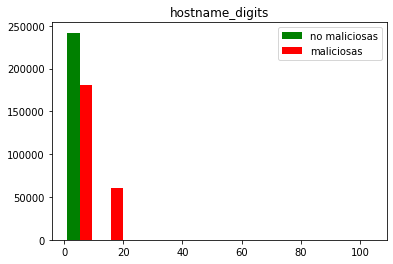

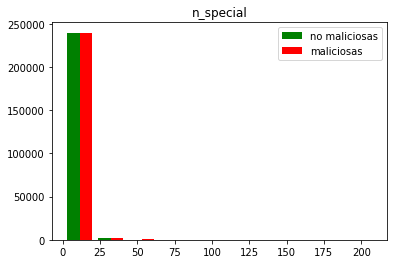

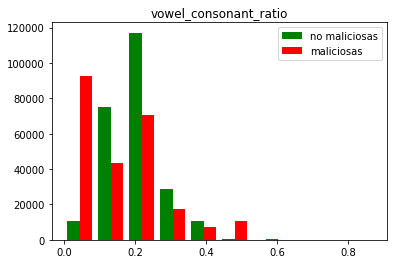

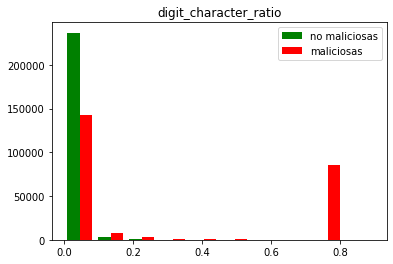

In [44]:
df_h_b = df_benign_url[non_binary_features]
df_h_m = df_malicious_url[non_binary_features]
for f in non_binary_features:
    plt.hist([df_h_b[f],df_h_m[f]], color = ['g','r'],label=['no maliciosas','maliciosas'])
    plt.legend()
    plt.title(f)
    plt.show()

### __Boxplots__ (comparación):<br>

Text(0.5, 1.0, 'digit_character_ratio')

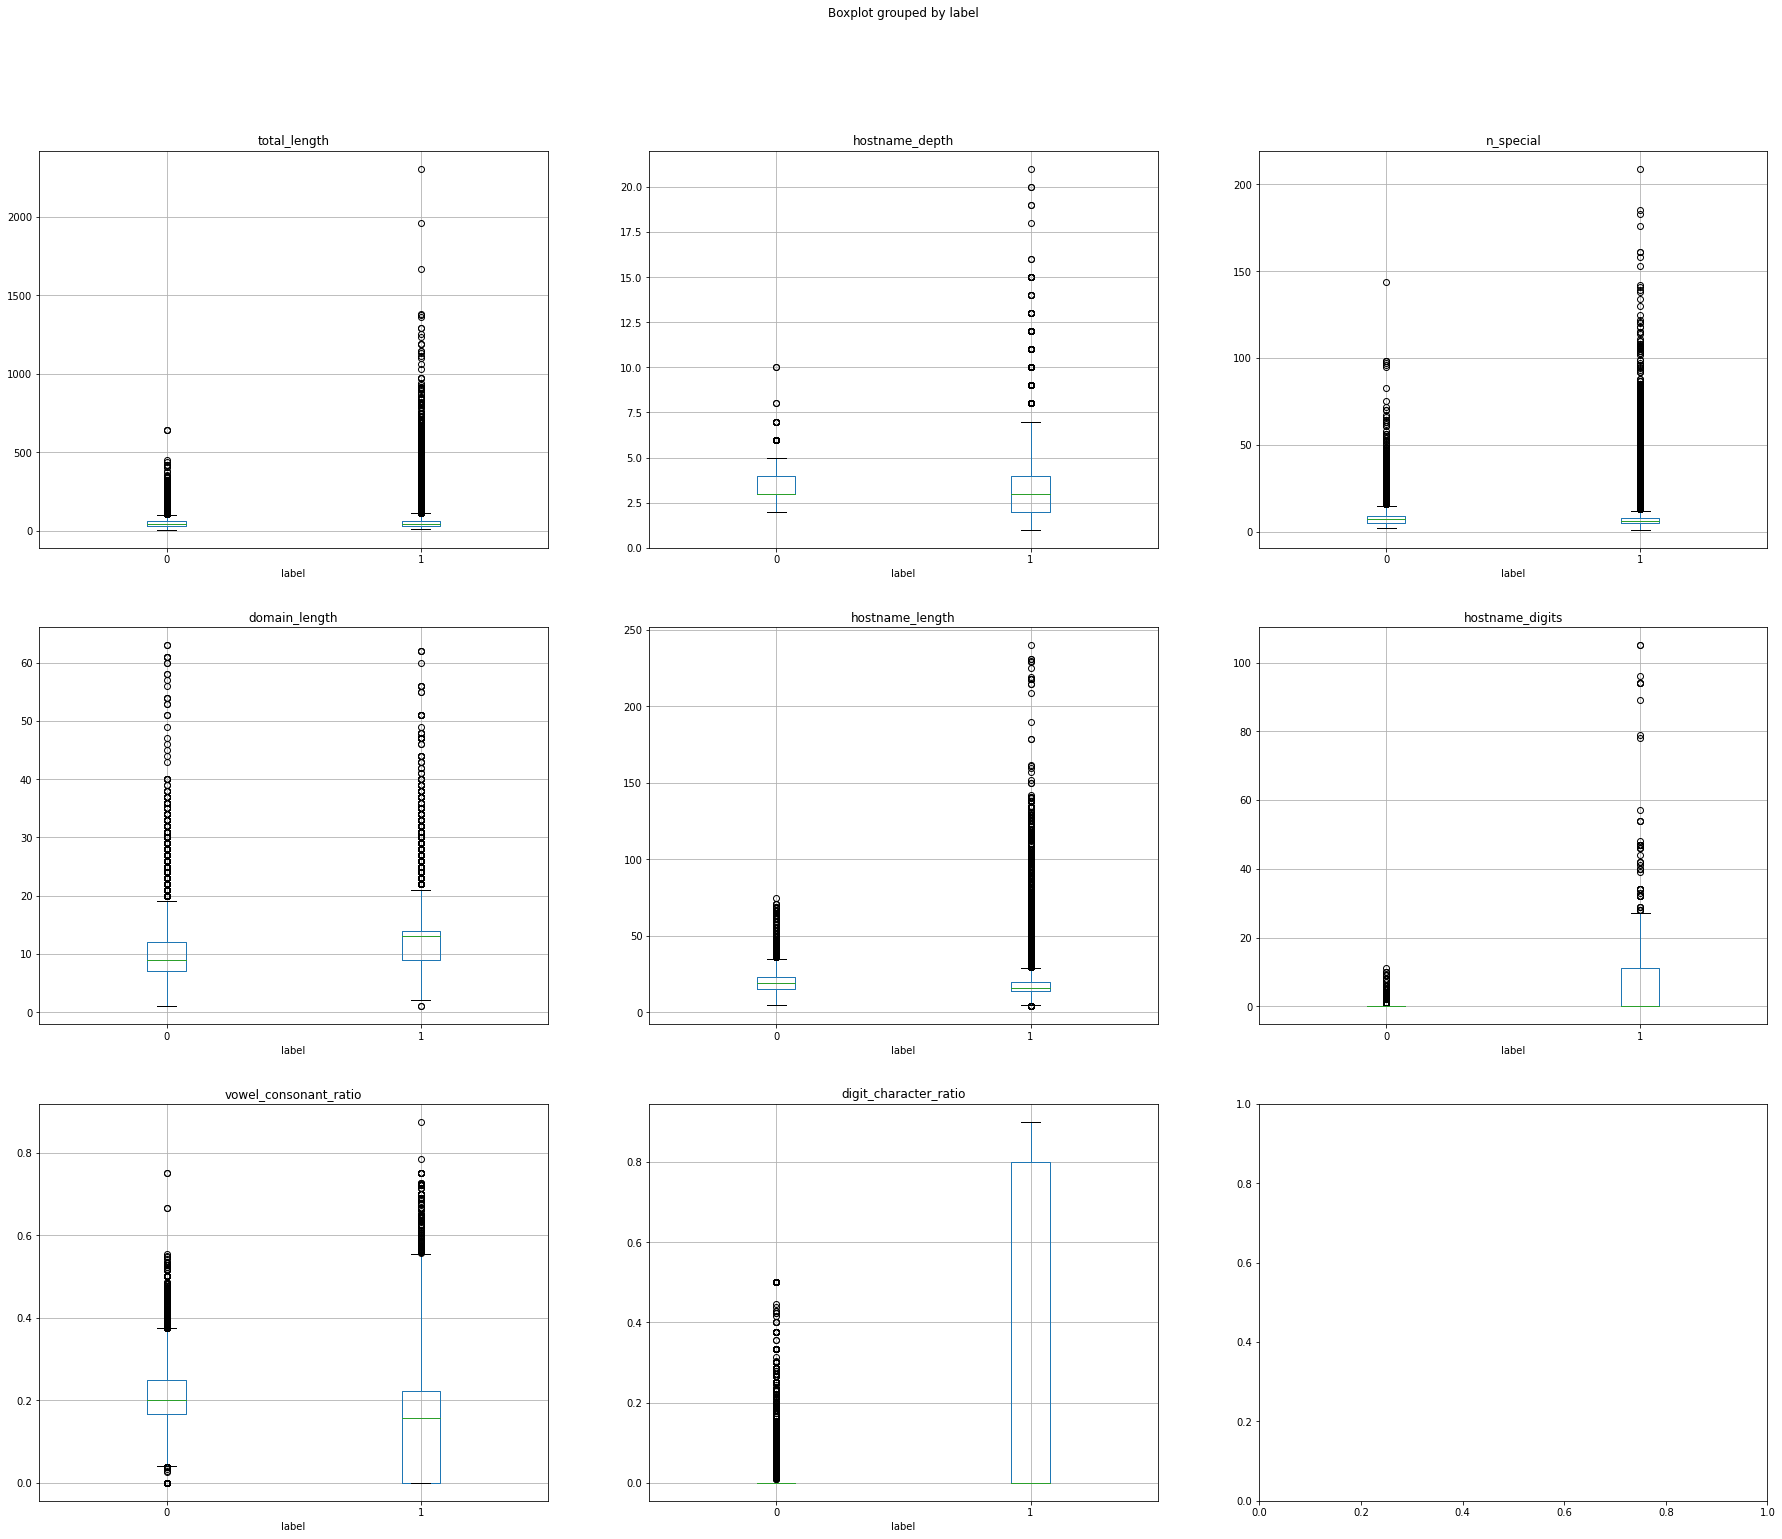

In [12]:
fig, axs = plt.subplots(3, 3,figsize=(30,25))
df_train.boxplot(column=['total_length'], by='label', ax=axs[0,0])
axs[0, 0].set_title('total_length')
df_train.boxplot(column=['hostname_depth'], by='label', ax=axs[0,1])
axs[0, 1].set_title('hostname_depth')
df_train.boxplot(column=['domain_length'], by='label', ax=axs[1,0])
axs[1, 0].set_title('domain_length')
df_train.boxplot(column=['hostname_length'], by='label', ax=axs[1,1])
axs[1, 1].set_title('hostname_length')
df_train.boxplot(column=['hostname_digits'], by='label', ax=axs[1,2])
axs[1, 2].set_title('hostname_digits')
df_train.boxplot(column=['n_special'], by='label', ax=axs[0,2])
axs[0, 2].set_title('n_special')
df_train.boxplot(column=['vowel_consonant_ratio'], by='label', ax=axs[2,0])
axs[2, 0].set_title('vowel_consonant_ratio')
df_train.boxplot(column=['digit_character_ratio'], by='label', ax=axs[2,1])
axs[2, 1].set_title('digit_character_ratio')

### __Countplots__ (comparación):<br>

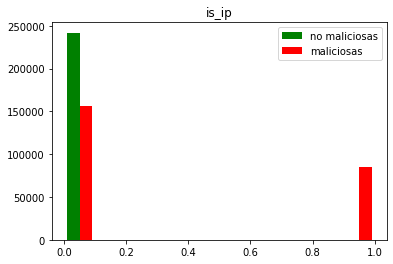

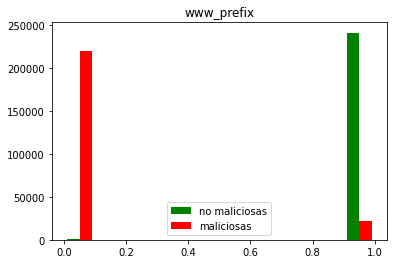

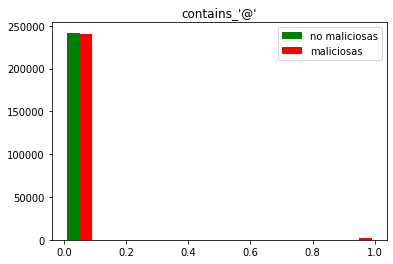

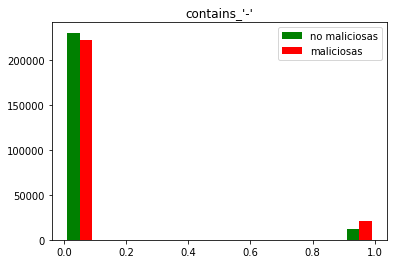

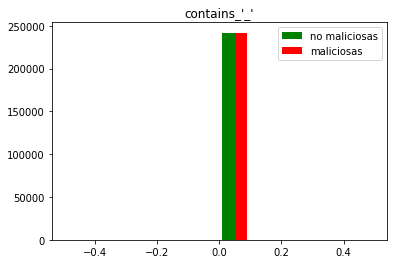

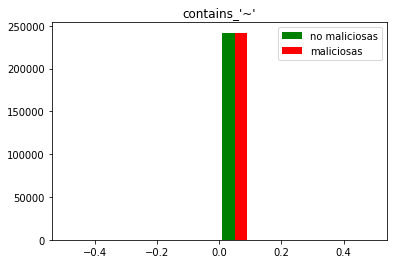

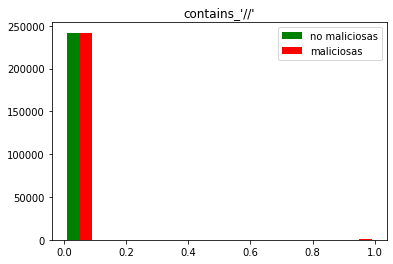

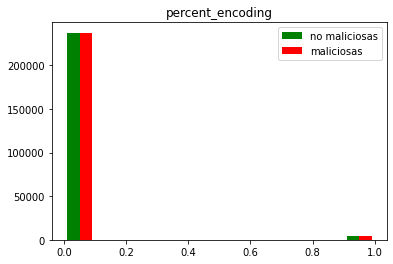

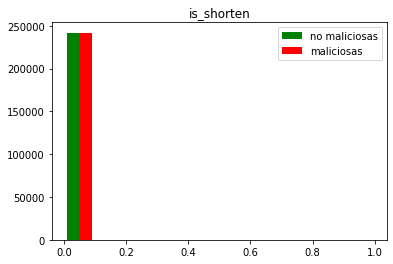

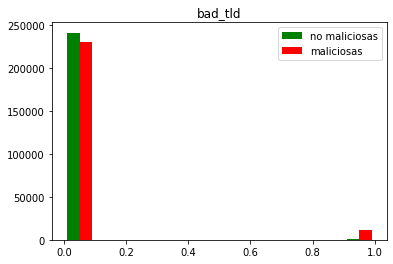

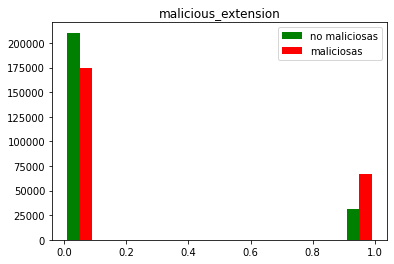

In [46]:
df_c_b = df_benign_url[binary_features]
df_c_m = df_malicious_url[binary_features]
for f in binary_features:
    plt.hist([df_c_b[f],df_c_m[f]], color = ['g','r'],label=['no maliciosas','maliciosas'])
    plt.legend()
    plt.title(f)
    plt.show()

<AxesSubplot:title={'center':'malicious_extension'}, xlabel='label'>

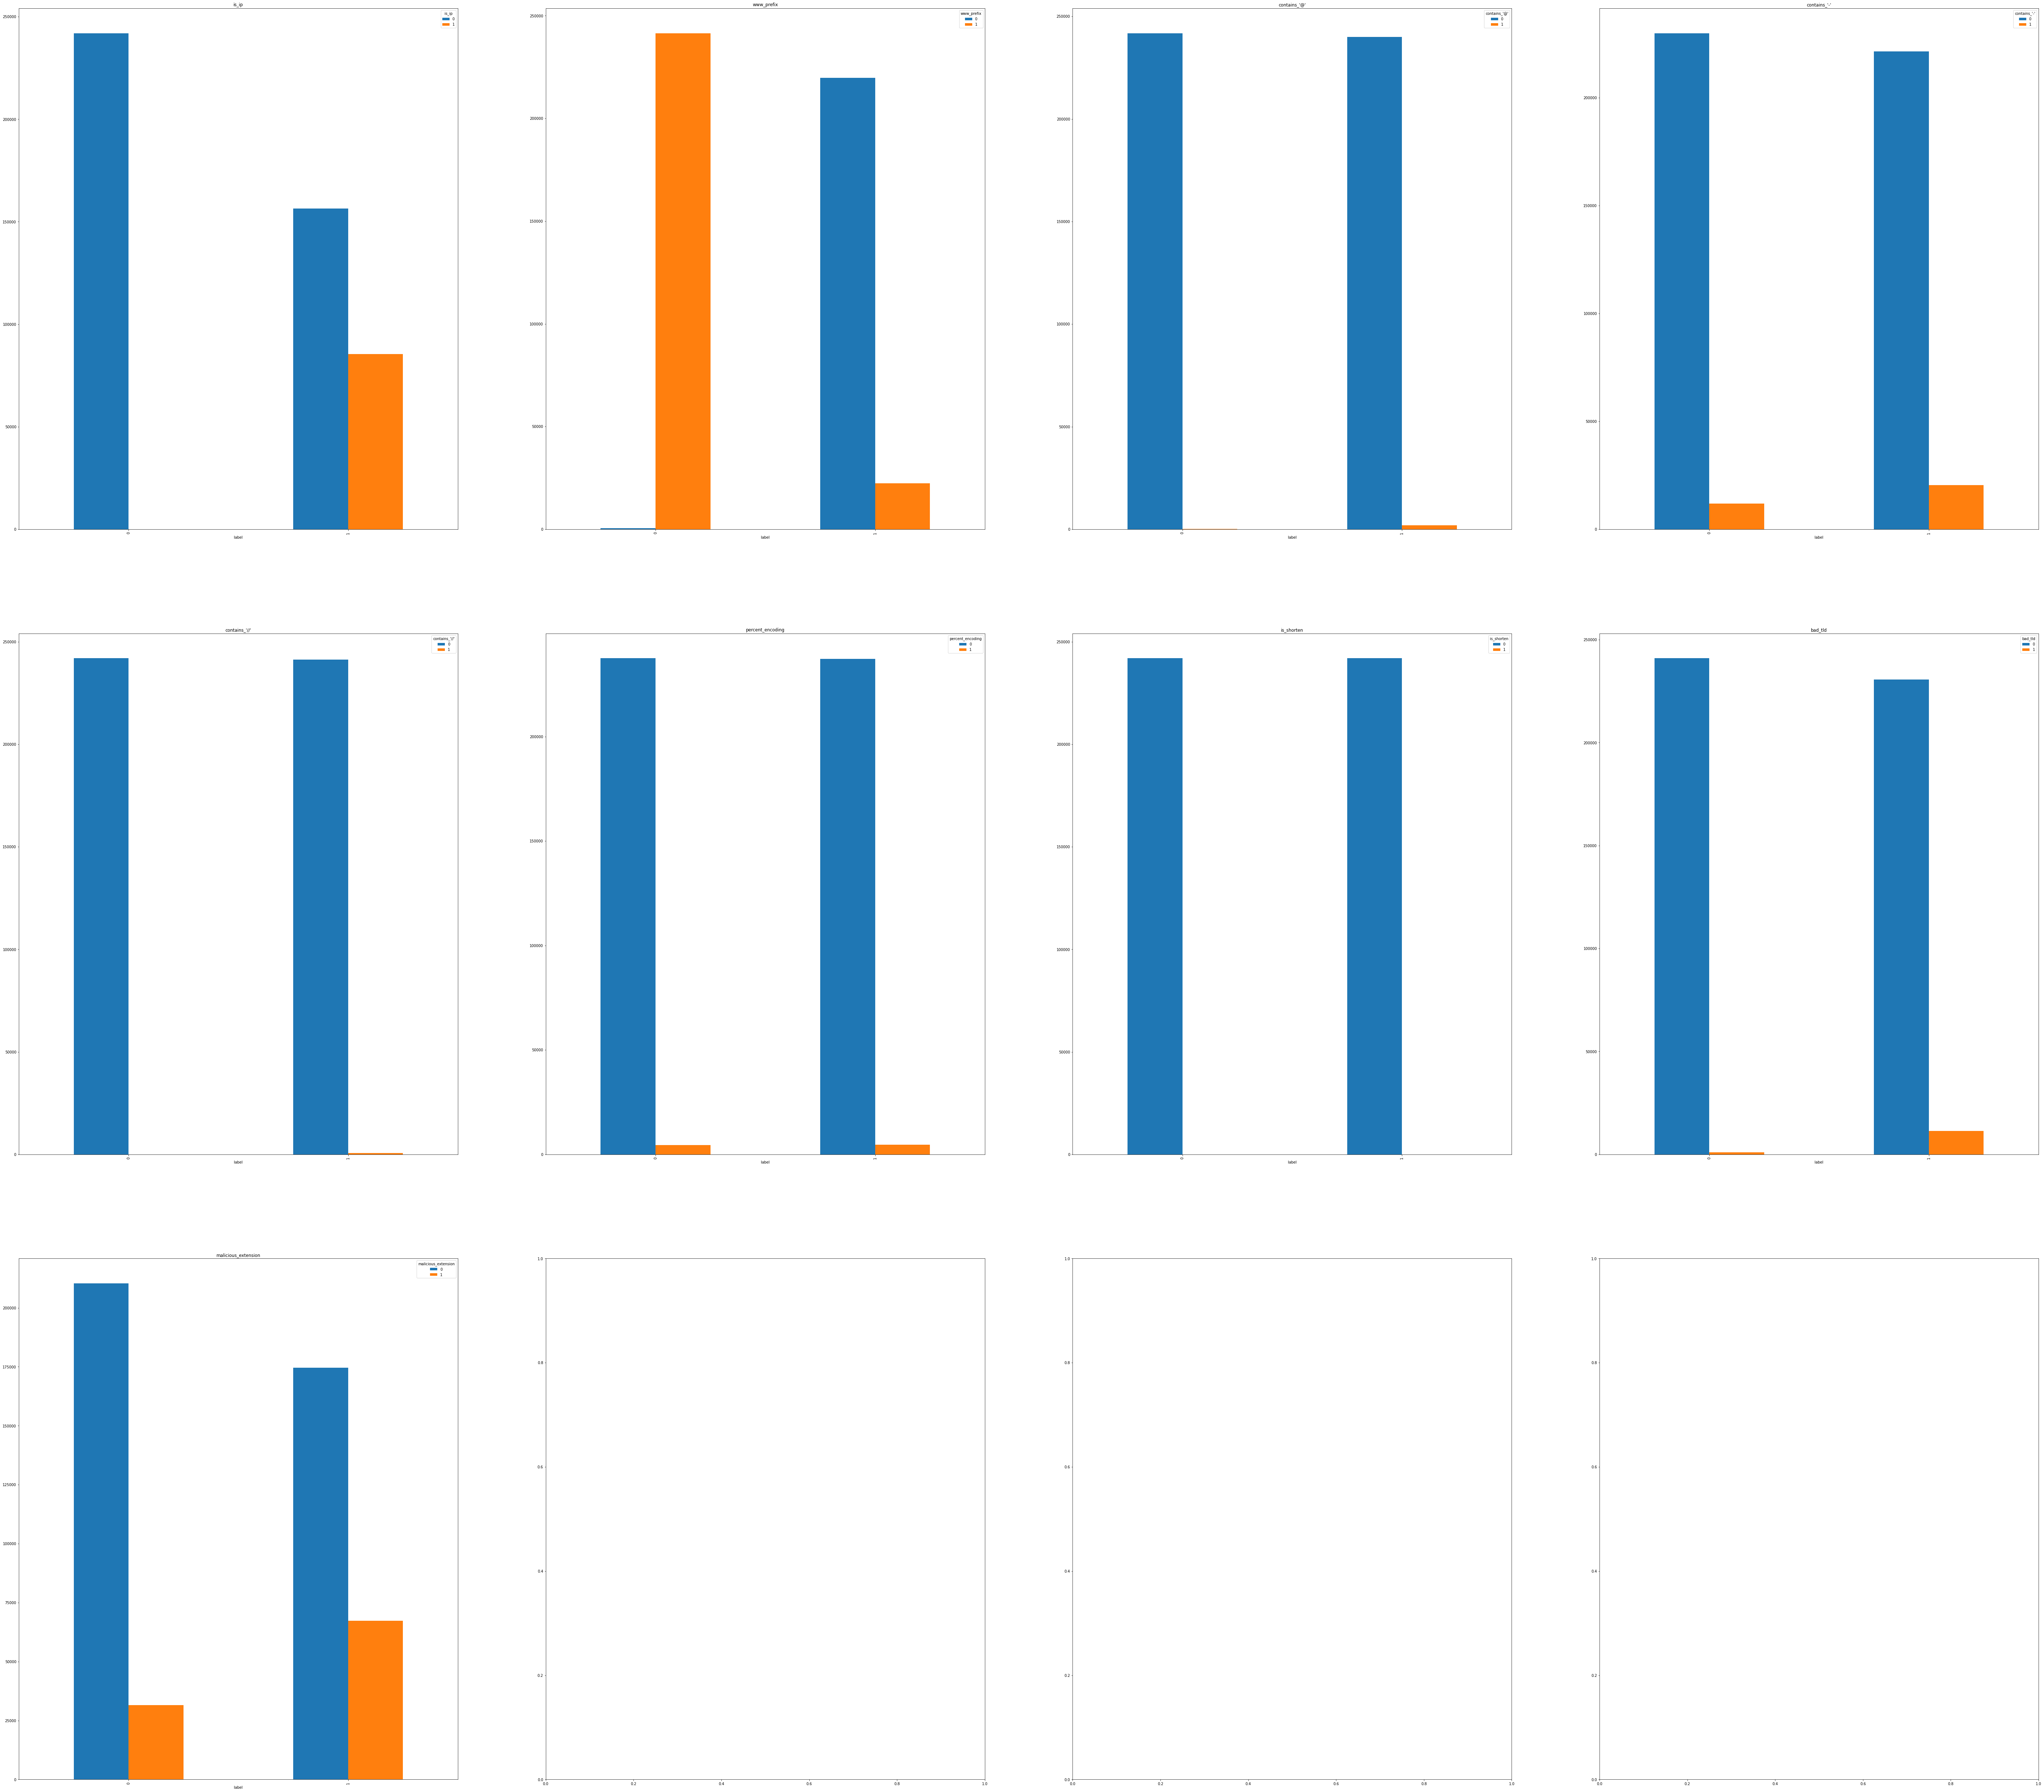

In [40]:
fig, axes = plt.subplots(3, 4, figsize=(100,90))
pd.crosstab(df_train["label"],df_train["is_ip"]).plot.bar(ax=axes[0,0], title = "is_ip", legend=True)
pd.crosstab(df_train["label"],df_train["www_prefix"]).plot.bar(ax=axes[0,1], title = "www_prefix", legend=True)
pd.crosstab(df_train["label"],df_train["contains_'@'"]).plot.bar(ax=axes[0,2], title = "contains_'@'", legend=True)
pd.crosstab(df_train["label"],df_train["contains_'-'"]).plot.bar(ax=axes[0,3], title = "contains_'-'", legend=True)
#pd.crosstab(df_train["label"],df_train["contains_'_'"]).plot.bar(ax=axes[1,1], title = "contains_'_'", legend=True)
#pd.crosstab(df_train["label"],df_train["contains_'~'"]).plot.bar(ax=axes[1,2], title = "contains_'~'", legend=True)
pd.crosstab(df_train["label"],df_train["contains_'//'"]).plot.bar(ax=axes[1,0], title = "contains_'//'", legend=True)
pd.crosstab(df_train["label"],df_train["percent_encoding"]).plot.bar(ax=axes[1,1], title = "percent_encoding", legend=True)
pd.crosstab(df_train["label"],df_train["is_shorten"]).plot.bar(ax=axes[1,2], title = "is_shorten", legend=True)
pd.crosstab(df_train["label"],df_train["bad_tld"]).plot.bar(ax=axes[1,3], title = "bad_tld", legend=True)
pd.crosstab(df_train["label"],df_train["malicious_extension"]).plot.bar(ax=axes[2,0], title = "malicious_extension", legend=True)


- Eliminamos características que no sirven:<br>

In [14]:
df_train = df_train.drop(["contains_'_'", "contains_'~'"], axis=1) 

In [36]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(df_benign_url['total_length'])
print(outlier_datapoints)

outlier_datapoints = detect_outlier(df_malicious_url['total_length'])
print(outlier_datapoints)

***
## Método 2 extracción de características<br>

Obtenemos una nube de palabras (Word Cloud) para comprobar de forma visual qué palabras son más comunes en las URLs maliciosas y en las no maliciosas. Para ello aplicamos este método sobre:

1. Tratando toda la URL como una única parte. <br>
2. Dividiendo la URL en sus 6 correspondientes partes. <br>

### 1. Tratando toda la URL como una única parte <br>

- URLs no maliciosas <br>

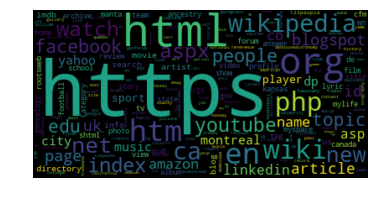

In [27]:
#Buenas
text = ''
for i in df_origin_benign.url:
    text += '.' + i

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- URLs maliciosas <br>

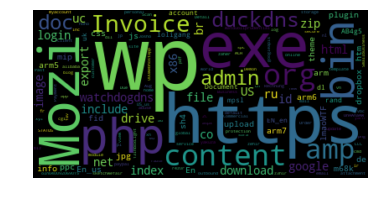

In [28]:
#Malas
text = ''
for i in df_origin_malicious.url:
    text += '.' + i

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Dividiendo la URL en sus 6 correspondientes partes <br>

- Leemos los datos: <br>

In [6]:
SUBFOLDER_METHOD_2 = "4_extraccion_caracteristicas" + os.sep + "metodo_2"

df_train = load_data("4_2_parts_train.csv",',', SUBFOLDER_METHOD_2)
print(len(df_train))
df_train.head()

483977


,protocolo,subdominio,dominio,tld,path,query,label
0,https,www.athletics,mta,ca,/varsity/football/cfl.html,NaN,0
1,https,drive,google,com,/file/d/1uis0mbfzg1vrxxg2ka2l18q9pdyrmqv8,NaN,1
2,http,NaN,xmotor,ir,/localization/closed_section/verified_area/752...,NaN,1
3,https,www.en,wikipedia,org,/wiki/papineau_(montreal_metro),NaN,0
4,https,www.eddiecibrian-actor,blogspot,com,/,NaN,0


- Agrupamos en maliciosas y no maliciosas: <br>

In [7]:
df_benign = df_train[df_train['label'] == 0] 
df_malicious = df_train[df_train['label'] == 1] 

#### - Protocolo <br>

- URLs no maliciosas: <br>

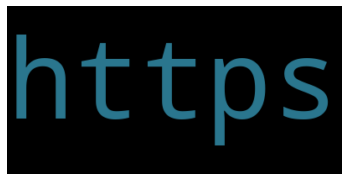

In [8]:
#Buenas
text = ''
for i in df_benign.protocolo:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
df_benign.groupby(['protocolo']).count()

,subdominio,dominio,tld,path,query,label
protocolo,,,,,,
https,241748,241988,241988,240264,32148,241988


- URLs maliciosas: <br>

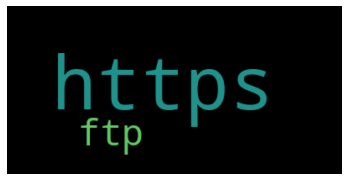

In [9]:
#Malas
text = ''
for i in df_malicious.protocolo:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
df_malicious.groupby(['protocolo']).count()

,subdominio,dominio,tld,path,query,label
protocolo,,,,,,
ftp,1,14,1,14,0,14
http,44707,213345,127930,212773,15212,213345
https,19606,28630,28499,28621,9835,28630


#### - Subdominio <br>

- URLs no maliciosas: <br>

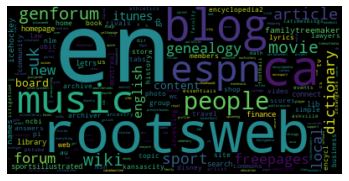

In [9]:
#Buenas
text = ''
for i in df_benign.subdominio:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- URLs maliciosas: <br>

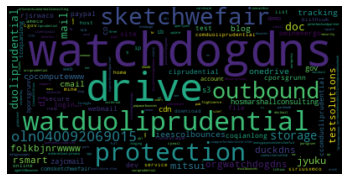

In [10]:
#Malas
text = ''
for i in df_malicious.subdominio:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### - Dominio <br>

- URLs no maliciosas: <br>

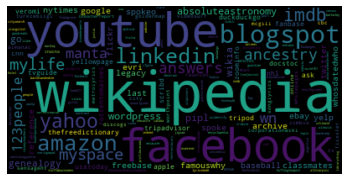

In [11]:
#Buenas
text = ''
for i in df_benign.dominio:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- URLs maliciosas: <br>

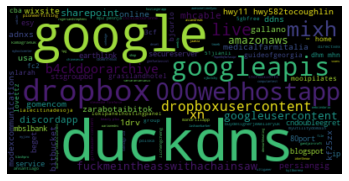

In [15]:
#Malas
text = ''
for i in df_malicious.dominio:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=True).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
a = df_google[df_google['subdominio'] == "www"] 
for i in a["query"].values:
    print(i)

sa=t&amp;rct=j&amp;q=&amp;esrc=s&amp;source=web&amp;cd=1&amp;cad=rja&amp;uact=8&amp;ved=0ahukewjvk_-rh9laahwhqjokhywodp8qfggpmaa&amp;url=http%3a%2f%2flean4me.nl%2fbakker-voegwerken%2f&amp;usg=aovvaw0vjaehvlxc5luo2merz6x5
sa=t&amp;rct=j&amp;q=&amp;esrc=s&amp;source=web&amp;cd=3&amp;cad=rja&amp;uact=8&amp;ved=0ahukewiksid57bfcahvlpsakhrrkdosqfgg0mai&amp;url=http%3a%2f%2fakumylator.by%2fcontacts&amp;usg=aovvaw1vwgubt3qbreodmhdcepnx
sa=t&amp;rct=j&amp;q=&amp;esrc=s&amp;source=web&amp;cd=1&amp;cad=rja&amp;uact=8&amp;ved=2ahukewj0jrfjro7dahxhurwkhzisawsqfjaaegqiabab&amp;url=https://nabib.services/contact&amp;usg=aovvaw2tfosp0267paeycmyclwmm
sa=t&amp;rct=j&amp;q=&amp;esrc=s&amp;source=web&amp;cd=8&amp;cad=rja&amp;uact=8&amp;ved=0ahukewibv6knuklzahwfblakheigataqfghjmac&amp;url=http%3a%2f%2fkarmaalert.com%2fproducts-page%2fproduct-category%2fpublic-figure-karma%2f&amp;usg=aovvaw0wkl-aiirdwffqc-s9rqun
showtitle=0&height=600&wkst=1&bgcolor=%23ffffff&src=qtbqjvhotpcmi2gbkhp15bbh7s@group.calendar.g

In [51]:
df_google = df_malicious[df_malicious['dominio'] == "google"] 
df_google.groupby(['subdominio']).count()

,protocolo,dominio,tld,path,query,label
subdominio,,,,,,
accounts,14,14,14,14,14,14
appengine,2,2,2,2,2,2
chrome,2,2,2,2,0,2
code,1,1,1,1,0,1
docs,265,265,265,265,216,265
drive,6173,6173,6173,6173,5374,6173
feedproxy,1,1,1,1,1,1
groups,2,2,2,2,1,2
k0ta,1,1,1,1,1,1


#### - TLD <br>

- URLs no maliciosas: <br>

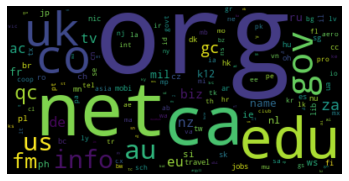

In [21]:
#Buenas
text = ''
for i in df_benign.tld:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- URLs maliciosas: <br>

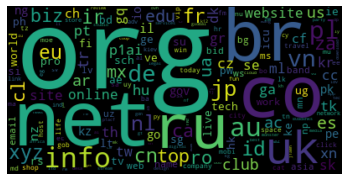

In [22]:
#Malas
text = ''
for i in df_malicious.tld:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### - Path <br>

- URLs no maliciosas: <br>

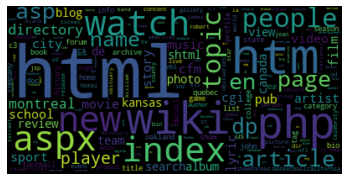

In [23]:
#Buenas
text = ''
for i in df_benign.path:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- URLs maliciosas: <br>

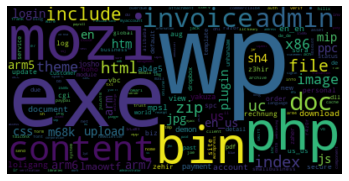

In [25]:
#Malas
text = ''
for i in df_malicious.path:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### - Query <br>

- URLs no maliciosas: <br>

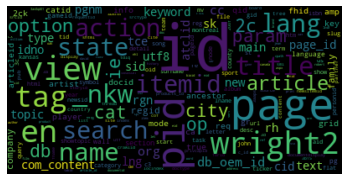

In [26]:
#Buenas
text = ''
for i in df_benign['query']:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- URLs maliciosas: <br>

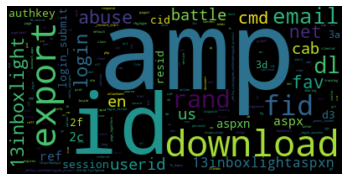

In [27]:
#Malas
text = ''
for i in df_malicious['query']:
    if str(i) != "nan":
        text += '.' + str(i)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()